In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,_), (x_test,_)= mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

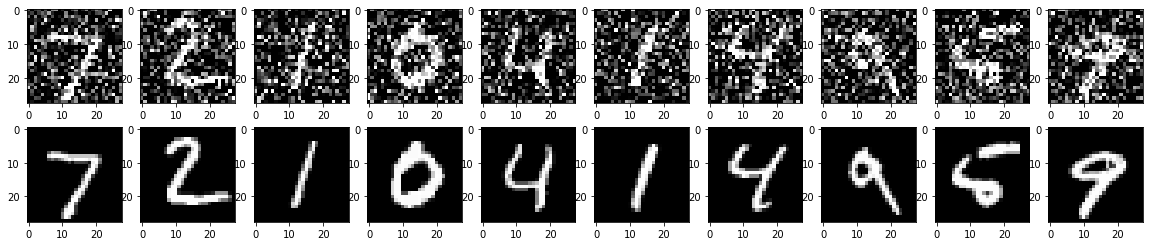

In [6]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

In [7]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
#autoencoder training
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 [==============================] - 68s 146ms/step - loss: 0.1113 - val_loss: 0.1073
Epoch 2/20
469/469 [==============================] - 68s 146ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 3/20
469/469 [==============================] - 67s 143ms/step - loss: 0.1044 - val_loss: 0.1024
Epoch 4/20
469/469 [==============================] - 64s 136ms/step - loss: 0.1027 - val_loss: 0.1011
Epoch 5/20
469/469 [==============================] - 59s 126ms/step - loss: 0.1015 - val_loss: 0.1002
Epoch 6/20
469/469 [==============================] - 59s 125ms/step - loss: 0.1005 - val_loss: 0.0995
Epoch 7/20
469/469 [==============================] - 58s 125ms/step - loss: 0.0997 - val_loss: 0.0984
Epoch 8/20
469/469 [==============================] - 59s 126ms/step - loss: 0.0990 - val_loss: 0.0981
Epoch 9/20
469/469 [==============================] - 62s 131ms/step - loss: 0.0985 - val_loss: 0.0974
Epoch 10/20
469/469 [==============================] - 63s 135ms/step - l

In [10]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 3s 10ms/step


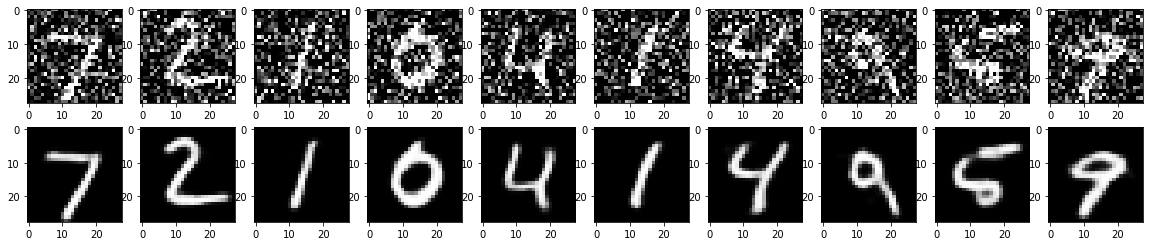

In [11]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    

    # Display reconstruction avec un plus petite dimention (16->8) entre
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()